# MACHINE LEARNING MODULE TASKS 2020

In this notebook I am listing the 4 tasks to complete for this Machine Learning module. 

## Table of contents: 

### Task 1. 

### Task 2. 

### Task 3. 

### Task 4. 



<br>

## Task 1: 

Create a Python function called 'sqrt2' that calculates and prints to the screen the square root of 2 to 100 decimal places. Remember that your code should not depend on any module from the standard library or otherwise. 
***
References: 

- [Map function use](https://www.programiz.com/python-programming/methods/built-in/map)

- [Reduce function use](https://www.geeksforgeeks.org/reduce-in-python/)

***




In [1]:

import math 

def sqrt2(n):
    return math.sqrt(2)
                   
#def round_up(sqrt2, decimals=100):
    #multiplier = 100 ** decimals
    #return math.ceil(sqrt2 * multiplier) 


print(sqrt2(2))#this formula prints 16 decimal spaces 







1.4142135623730951


In [2]:
mapping (sqrt2,samplenumber)







NameError: name 'mapping' is not defined

<br>


## Task 2:

Given the table below extracted from the Wikipedia article for the Chi-squared test which states that the Chi-squared value based on it is approximately 24.6 . Use module scipy.stats to verify this value and calculate the associated *p* value.

***
References:

- [Chi-squared Wikipedia page](https://en.wikipedia.org/w/index.php?title=Chi-squared_test&oldid=983024096)
- [How to do a chi-square test for independence](https://stattrek.com/chi-square-test/independence.aspx)
- [introduction to chi-squared test for machine learning](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/ )
- [Scipy stats chi2 contingency documentation ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)
- [Scipy stats contengency expected frequency function documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.expected_freq.html#scipy.stats.contingency.expected_freq)

***

The Chi-squared test is perform when the test statistics is chi-squares distributed . We perform a Pearson's chi-squared test in order to determine whether there is a statistically singnificant difference between expected and observed frequencies in or more categories of a contingency table. In this case we work with 3 categories/classes ( white collar, blue collar or non collar) and 4 variables representing different neighbourghoods (A,B,C and D).

In order to confirm the approximate Chi-squared value of 24.6 and find 'p' based on the example contingency table [here](https://en.wikipedia.org/w/index.php?title=Chi-squared_test&oldid=983024096), I have followed the steps detailed below: 

- 1. First, I have imported the necessary modules and create my observations table as  numpy array. 

- 2. Within the module 'scipy stats contingency' I have used 'expected_freq' function to find and print a table with the expected frequencies from our contingency table containing the observation values. 


In [ ]:

#For some parts of the code I used this source: https://machinelearningmastery.com/chi-squared-test-for-machine-learning/ 
#Imported necessary modules first
import numpy as np 
from scipy.stats import chi2_contingency
from scipy.stats.contingency import expected_freq 

table= np.array([[90,60,104,95], #Creating contingency table with observed values
                  [30,50,51,20],
                  [30,40,45,35],
                  ])
print (table)#We print the table with the observed values

observed = table 
expected_freq(observed)#here use this function to create andb print the arrays of expected frequency values 


<br>

- 3. Then I confirmed the degree of freedom is 6 with the function detailed in [Python SciPy.org](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)
- 4. Having dof , I was able to use chi2_contingency function to confirm 'p' and Chi-Squared value. 

In [ ]:
#Now we need to find the 'p'value and confirm that the Chi-squared value is 24.6.

dof = observed.size - sum(observed.shape) + observed.ndim - 1 #Confirming degree of freedom in this case is 6

print(dof) # confirming dof is correct

#to find p:

chi2, p, dof, ex = chi2_contingency(observed, correction=False)

print(chi2) # printing this value we can see that it is correct, and we can confirm 'p' value is then also correct

print(p)

<br>


## Task 3:

 The standard deviation of an array of numbers x is calculated using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x)).
 
 However, Microsoft Excel has two different versions of the standard deviation calculation, STDEV.P and STDEV.S . The STDEV.P function performs the above calculation but in the STDEV.S calculation the division is by len(x)-1 ratherthan len(x) .Research these Excel functions, writing a note in a Markdown cell about the difference between them. Then use numpy to perform a simulation demonstrating that the STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample.
 
 ***
 References:

- [Numpy STD documentation](https://numpy.org/doc/stable/reference/generated/numpy.std.html?highlight=standard%20deviation)
- [Microsoft documentation STDEV in Excel](https://support.microsoft.com/en-us/office/stdevp-function-1f7c1c88-1bec-4422-8242-e9f7dc8bb195)
- []()
- []()

***
 

<br>


### Standard deviaton using numpy: 

The standard deviation indicates us how far an observed value is from the mean. 
In order to calculate the standard deviation using numpy , we have the formula below. Let's see a practical example below:


In [ ]:
#calculating standard deviation using numpy package: 

#first I imported the necessary packages

import numpy as np 

#Using two of the arrays from the previous task as example
x=  np.array([30,50,51,20])

np.sqrt(np.sum((x - np.mean(x))**2)/len(x))#This function canculates the standard deviation of a population. 
#if we want to 


In [ ]:
#let's try now to calculate the standard deviation of a sample using numpy: 

np.std(x)

<br>


### Standard deviaton using Excel:

**Standard deviation using STDEV.P :**
Calculates standard deviation using the entire population. 

**Standard deviation using STEDV.S:**
This function calculates the standard deviation using a sample of the population.Due to this reason the calculation of the division is by len(x)-1 while with STEDV.P it is len(x). 



<br>


## Task 4:

Using module scikit-learn  apply k-means clustering to Fisher’s famous Iris data set. You will easily obtain a copy of the data set online. Explain in a Markdown cell how your code works and how accurate it might
be, and then explain how your model could be used to make predictions of species of iris.
***
References:

[K-means documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)
[K-Means clustering further documentation](https://www.datacamp.com/community/tutorials/k-means-clustering-python)
[]()
[]()

In [3]:

#First we import the necessary modules:

import numpy as np 
import sklearn.cluster as KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



#Now I load Fisher's Iris Data set and print its heading: 

df=pd.read_csv(r"C:\Users\fainl\OneDrive\Documents\GMITSEP2020\Machine learning -tasks\Machine Learning-Tasks\Irisdataset.csv", encoding = "utf-8")

df.reset_index(drop=True, inplace=True)


df.head()





,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:

#I separate  my 3 iris flowers species based on it index location in dataset to plot: 

#setosa=df.loc[df["Species"]=="Iris-setosa"]
#virginica=df.loc[df["Species"]=="Iris-virginica"]
#versicolor=df.loc[df["Species"]=="Iris-versicolor"]

#printing some describing statistics to see what can be the assumptions taken from this data set:

print(df.describe()) 


               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


<br>

We can see with describe function what is the mean and standard deviation of the different parameters we can use to categorise the iris flowers (sepal length, sepal width, petal lemgth and petal width)in cm.


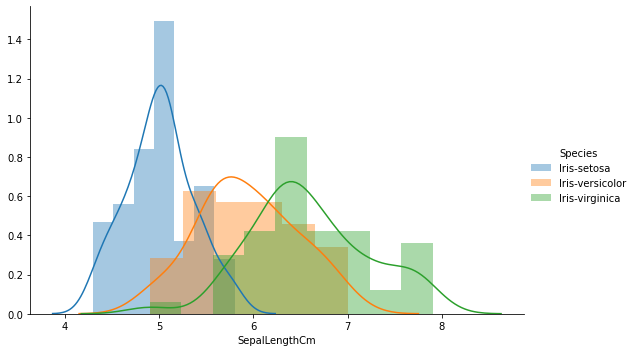

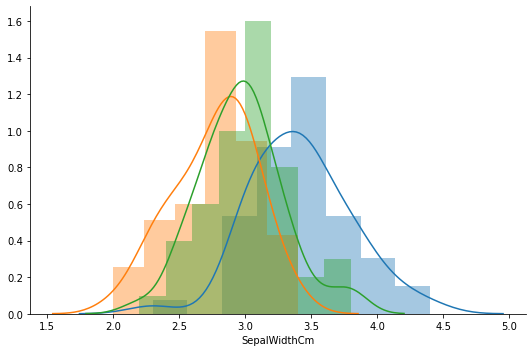

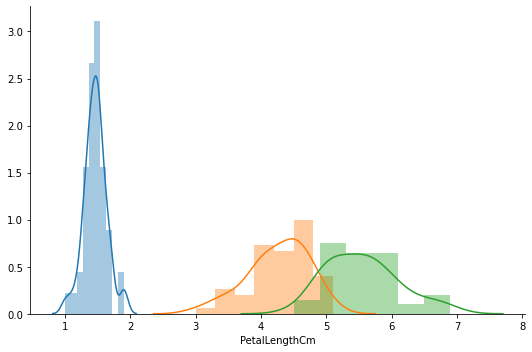

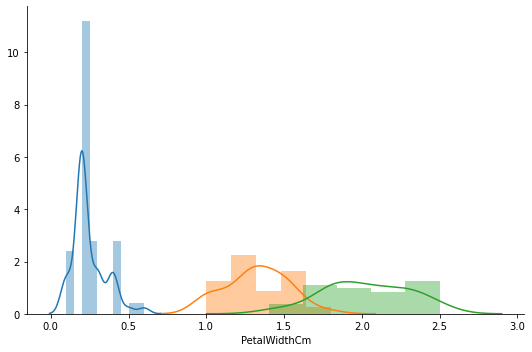

In [5]:
#Plotting dataset before using K-Means: 
#to see the comparison between sepal length and width between the 3 species

sns.FacetGrid(df,hue="Species",height=5,aspect=1.5).map(sns.distplot,"SepalLengthCm").add_legend()
sns.FacetGrid(df,hue="Species",height=5,aspect=1.5).map(sns.distplot,"SepalWidthCm")
sns.FacetGrid(df,hue="Species",height=5, aspect=1.5).map(sns.distplot,"PetalLengthCm")
sns.FacetGrid(df,hue="Species",height=5, aspect=1.5).map(sns.distplot,"PetalWidthCm")

plt.show()

<br>
Observing the facetgrid above , we can see that in general setosa species of iris flowers seem to be clearly differenciated in dimensions from the other two species. Setosas seem to have longer sepals along with generally bigger petals. 
Between versicolor and virginica, which are in general smaller than setosas, there is not much differenciation. 
Let's use K-means to see if it is possible to predict to which species a flower belongs. 

In [6]:
#Now I am trying this again using iris dataset version from sklearn library: 

#First I import necessary module and load data set

import numpy as np 
from sklearn.datasets import load_iris

np.random.seed(5)

iris = load_iris()
X = iris.data
y = iris.target

print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [10]:
#Building the model:

kmeans= KMeans(n_clusters=3, random_state=0)

y_kmeans=kmeans.fit_predict(X)
# I need 3 clusters for the different species

TypeError: 'module' object is not callable

In [8]:
# See the labels of the points.
kmeans.labels_



NameError: name 'kmeans' is not defined

In [9]:
#Now we work in our center points: 

iriscent=kmeans.cluster_centers_

print(iriscent)


NameError: name 'kmeans' is not defined